In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Dataset.csv")
print(data.head())
print(data.describe())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

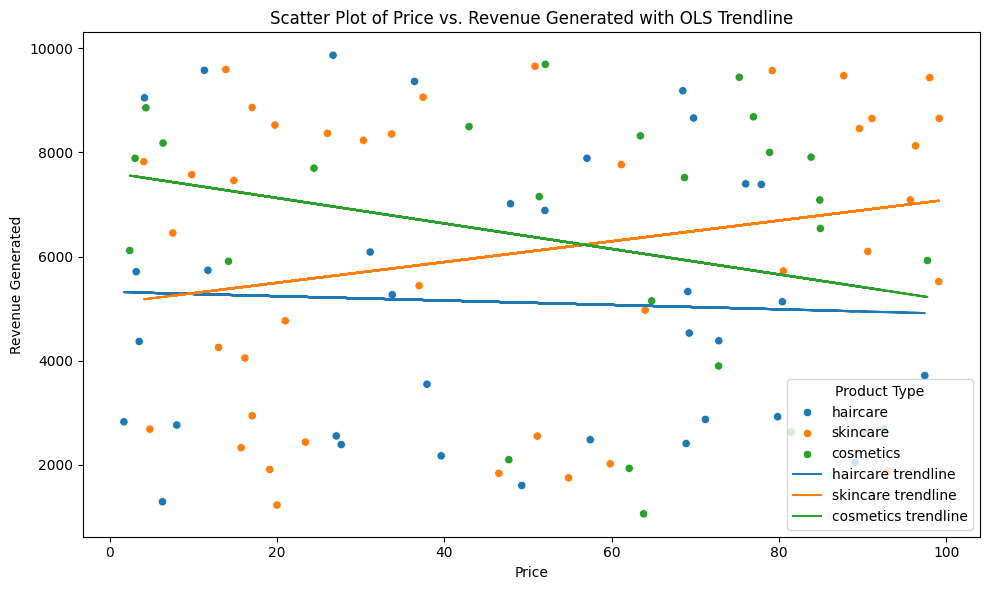

In [39]:
import numpy as np
import statsmodels.api as sm

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Price',
                y='Revenue generated',
                hue='Product type',
                data=data,)

for product_type in data['Product type'].unique():
    subset = data[data['Product type'] == product_type]

    X = subset['Price']
    Y = subset['Revenue generated']
    X_with_const = sm.add_constant(X)  # Add constant to the model (intercept)
    model = sm.OLS(Y, X_with_const).fit()

    plt.plot(X, model.predict(X_with_const), label=f'{product_type} trendline')

plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Scatter Plot of Price vs. Revenue Generated with OLS Trendline')


plt.legend(title='Product Type')
plt.tight_layout()
plt.show()


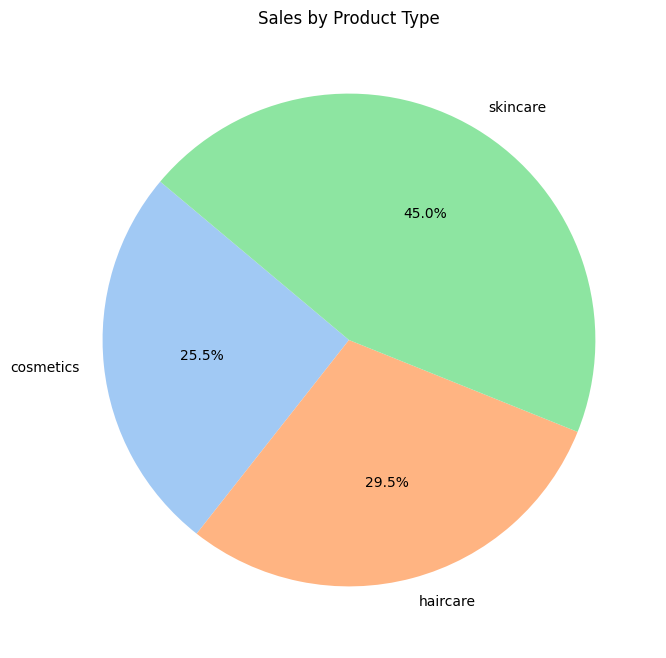

In [4]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(sales_data['Number of products sold'], labels=sales_data['Product type'], autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=140)
plt.title('Sales by Product Type')
plt.show()


<ipython-input-5-25219e3064a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping carriers', y='Revenue generated', data=total_revenue, palette='viridis')


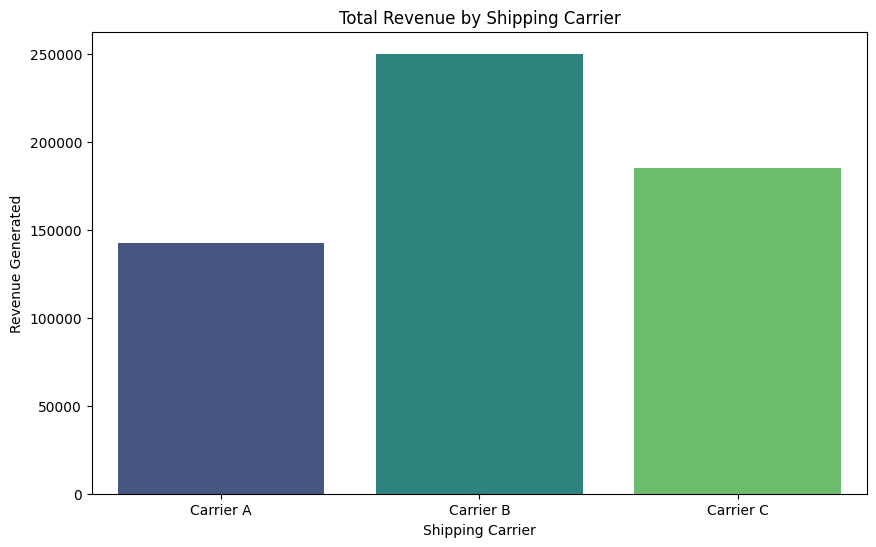

In [5]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping carriers', y='Revenue generated', data=total_revenue, palette='viridis')
plt.title('Total Revenue by Shipping Carrier')
plt.xlabel('Shipping Carrier')
plt.ylabel('Revenue Generated')
plt.show()


  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


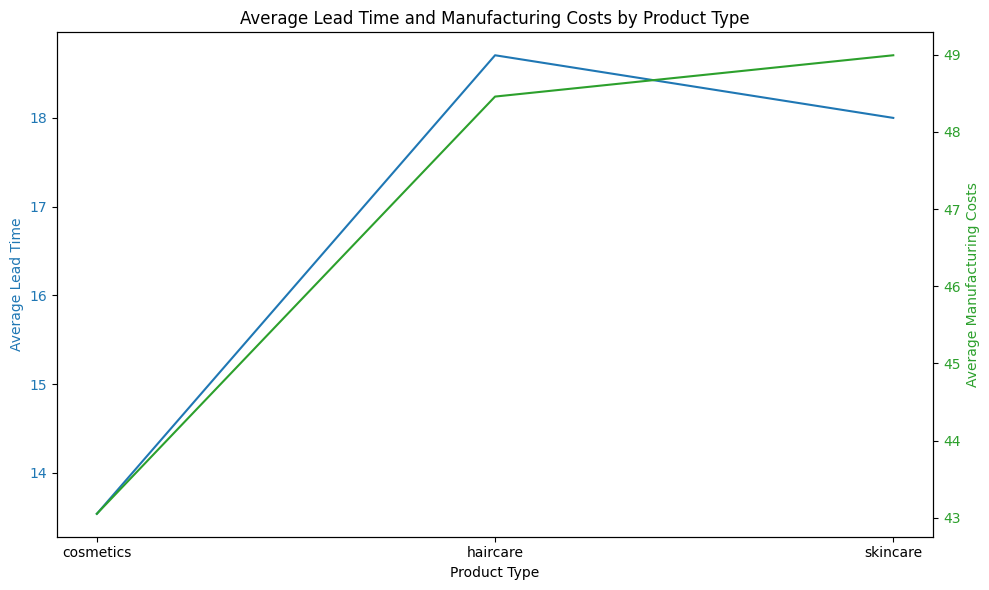

In [13]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)



print(result)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Average Lead Time', color=color)
sns.lineplot(x='Product type', y='Average Lead Time', data=result, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Manufacturing Costs', color=color)
sns.lineplot(x='Product type', y='Average Manufacturing Costs', data=result, ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Lead Time and Manufacturing Costs by Product Type')
fig.tight_layout()
plt.show()


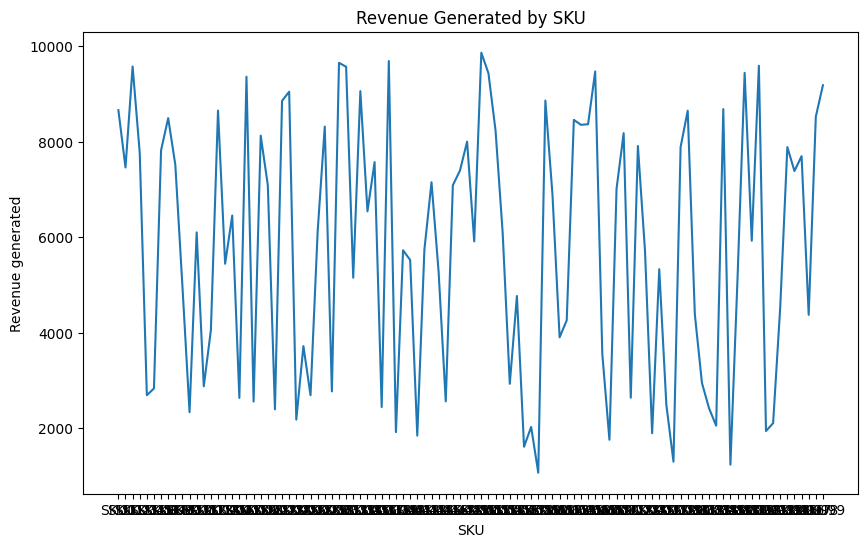

In [14]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='SKU', y='Revenue generated', data=data)
plt.title('Revenue Generated by SKU')
plt.show()


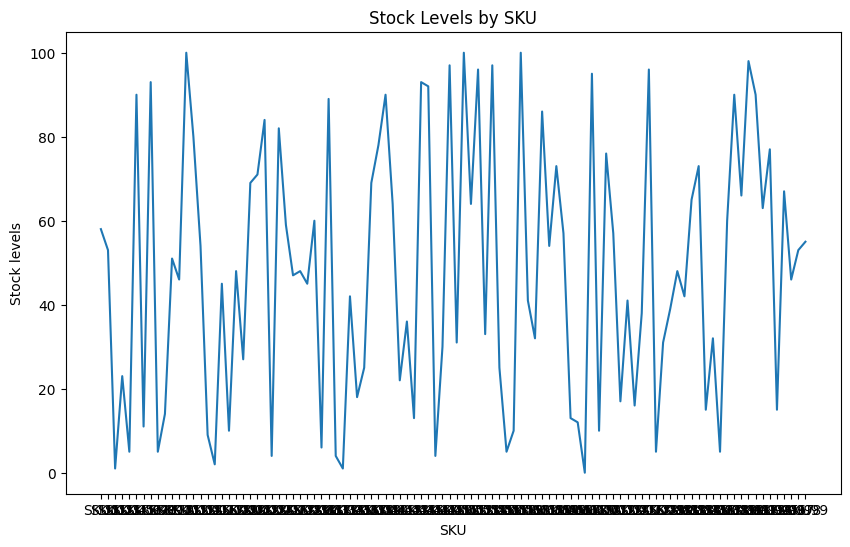

In [15]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='SKU', y='Stock levels', data=data)
plt.title('Stock Levels by SKU')
plt.show()


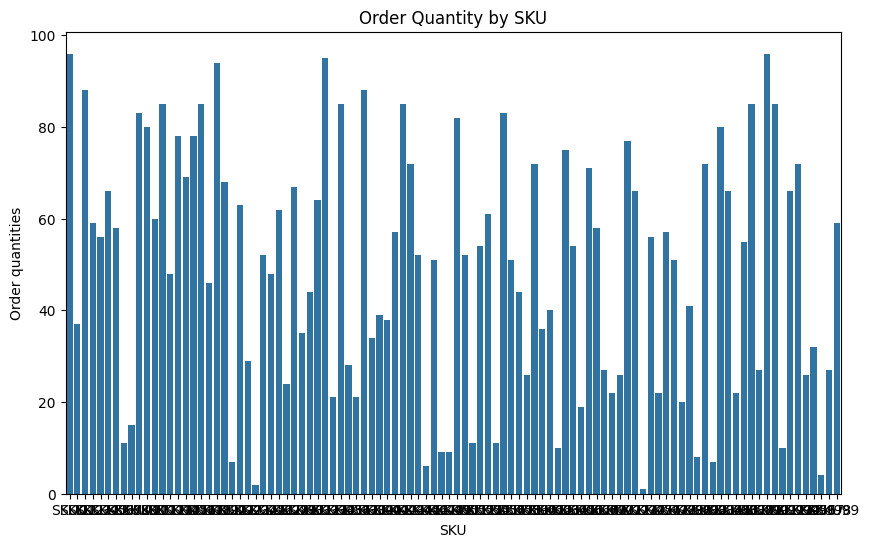

In [16]:

plt.figure(figsize=(10, 6))
sns.barplot(x='SKU', y='Order quantities', data=data)
plt.title('Order Quantity by SKU')
plt.show()


<ipython-input-33-8adae2ca5cbd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Shipping carriers', y='Shipping costs', data=carrier_costs, palette='Blues_d')


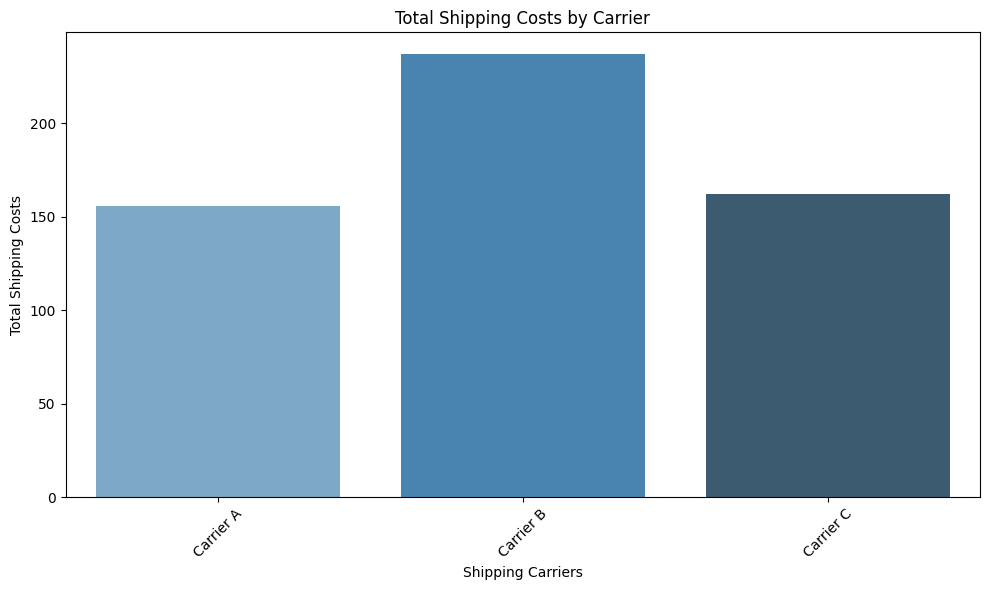

In [33]:
carrier_costs = data.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()

# Seaborn bar chart for total shipping costs by carrier
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping carriers', y='Shipping costs', data=carrier_costs, palette='Blues_d')
plt.xlabel('Shipping Carriers')
plt.ylabel('Total Shipping Costs')
plt.title('Total Shipping Costs by Carrier')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

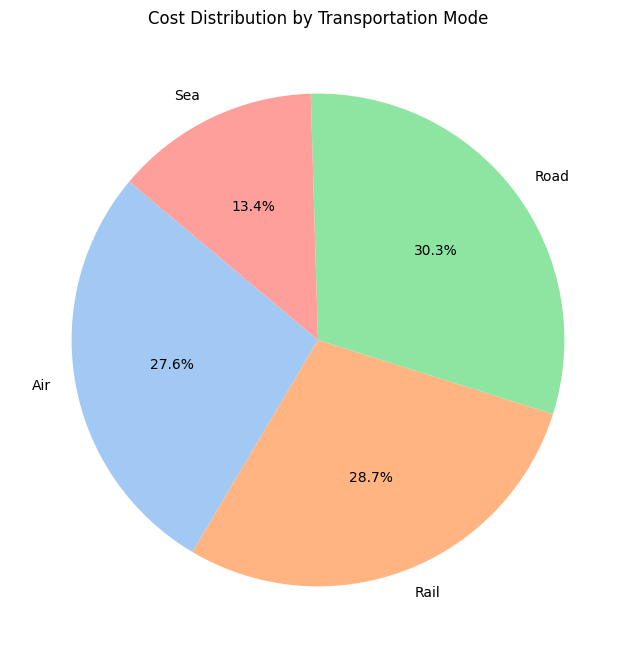

In [41]:

cost_distribution = data.groupby('Transportation modes')['Costs'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(cost_distribution['Costs'], labels=cost_distribution['Transportation modes'], autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=140)
plt.title('Cost Distribution by Transportation Mode')
plt.show()


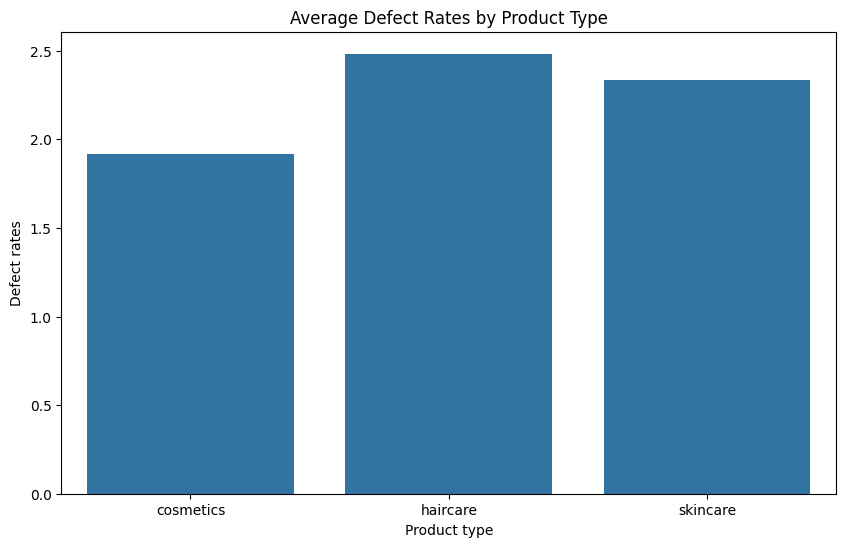

In [42]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Defect rates', data=defect_rates_by_product)
plt.title('Average Defect Rates by Product Type')
plt.show()


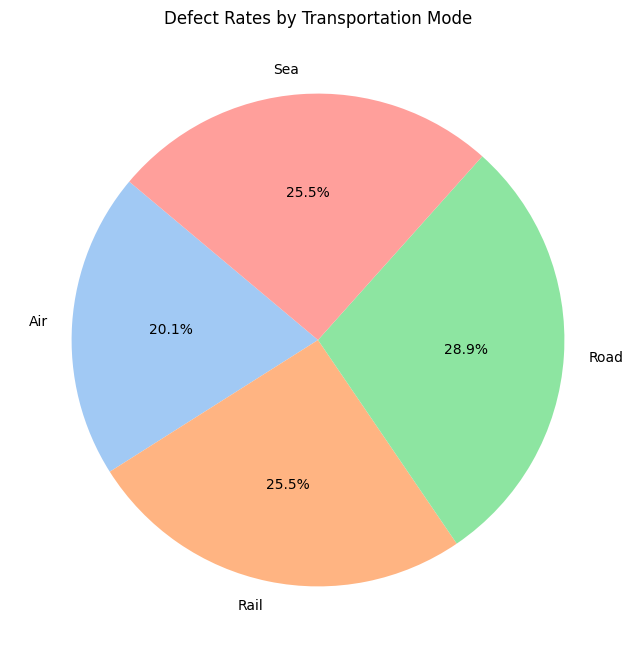

In [43]:
pivot_table = pd.pivot_table(data, values='Defect rates', index=['Transportation modes'], aggfunc='mean').reset_index()

plt.figure(figsize=(8, 8))
plt.pie(pivot_table['Defect rates'], labels=pivot_table['Transportation modes'], autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=140)
plt.title('Defect Rates by Transportation Mode')
plt.show()
